# Импорт

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Image

import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

from LookGenerator.datasets.person_segmantation_dataset import PersonSegmentationDataset, PersonSegmentationDatasetMultichannel
from LookGenerator.networks.segmentation import UNet, train_unet
from LookGenerator.networks.utils import load_model
import LookGenerator.datasets.transforms as custom_transforms
from LookGenerator.datasets.utils import prepare_image_for_model_transpose, to_array_from_model_transpose, show_array_multichannel
from LookGenerator.datasets.utils import prepare_image_for_model_transpose, to_array_from_model_bin_transpose


# Загрузка данных

In [2]:
import albumentations

transform_input = transforms.Compose([
    transforms.Resize((256, 192)),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.25, 0.25, 0.25]
    )
])

transform_output = transforms.Compose([
    transforms.Resize((256, 192)),
    custom_transforms.MinMaxScale(),
    custom_transforms.ThresholdTransform(threshold=0.5)
])

transform = albumentations.Compose([
    albumentations.Resize(height=256, width=192),

    albumentations.RandomBrightnessContrast(brightness_limit=(0.1,0.3), contrast_limit=(0.2,0.7), p =0.2),
    albumentations.Equalize(p = 0.2),
    albumentations.GaussNoise(p = 0.2),
    albumentations.Affine(translate_percent=0.1, scale=(0.8, 1), rotate=(-90,90), p=0.2),

    albumentations.Normalize(mean = (0.5, 0.5, 0.5), std = (0.25, 0.25, 0.25))
])

In [3]:
batch_size_train = 32
batch_size_val = 16

In [4]:
train_dataset = PersonSegmentationDataset(r"C:\Users\Даша\кто\мусор\zalando-hd-resized\train\augmentation", transforms_ = transform)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)
len(train_dataloader)

122

In [5]:
val_dataset = PersonSegmentationDataset(r"C:\Users\Даша\кто\мусор\zalando-hd-resized\train\augmentation", transforms_ = albumentations.Resize((192, 256)))
val_dataloader = DataLoader(val_dataset, batch_size=batch_size_val, shuffle=False)
len(val_dataloader)

59

Test load train_dataloader. and val.

torch.Size([32, 3, 256, 192])
torch.Size([32, 1, 256, 192])


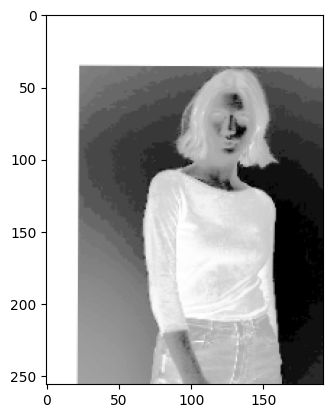

In [6]:
for X, y in train_dataloader:
    print(X.shape)
    print(y.shape)
    plt.imshow(X.detach().numpy()[0,0,:,:], cmap = 'binary')
    # plt.show()
    # plt.imshow(y.detach().numpy()[0,0,:,:], cmap = 'binary')
    # plt.show()
    # modelled_img = to_array_from_model_bin_transpose(transform_output(X.detach()))
    # plt.imshow(modelled_img,cmap = 'binary')
    # plt.show()
    # modelled_img = to_array_from_model_bin_transpose(transform_output(y.detach()))
    # plt.imshow(modelled_img,cmap = 'binary')
    # plt.show()
    break

# Обучение модели

Метки классов на изображении:

1. Левое лицо                       248,251,14
2. Правое лицо                      251,235,25
3. Туловище                         20,80,194
4. Внешняя верхняя левая рука       190,189,96
5. Внешняя верхняя правая рука      215,187,88
6. Внешняя нижняя левая рука        252,206,48
7. Внешняя нижняя правая рука       250,220,36
8. Внутренняя верхняя левая рука    145,191,116
9. Внутренняя верхняя правая рука   170,190,105
10. Внетренняя нижняя левая рука     228,191,74
11. Внутренняя нижняя правая рука    240,198,60
12. Левая кисть                      8,110,221
13. Правая кисть                     4,98,224
14. Левая нога                       22,173,184
15. Правая нога                      6,166,198

In [7]:
model = UNet(in_channels=3, out_channels = 1)
#model = load_model(model, r'C:\Users\DenisovDmitrii\Desktop\segmentation_weits\session12\asd.pt')
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [8]:
import datetime
now = datetime.datetime.now()
print("start time", now.strftime("%d-%m-%Y %H:%M"))

train_history, val_history = train_unet(
    model,
    train_dataloader,
    val_dataloader,
    optimizer,
    device=device,
    epoch_num=200,
    save_directory="C:\\Users\\DenisovDmitrii\\Desktop\\segmentation_weits\\session22"
)
old = now
now = datetime.datetime.now()
print("end time", now.strftime("%d-%m-%Y %H:%M"))
print("delta", now - old)


start time 24-02-2023 13:26
Epoch 0 of 199, train loss: 0.02150
Epoch 0 of 199, val loss: 0.01666
Epoch 1 of 199, train loss: 0.00639
Epoch 1 of 199, val loss: 0.00344
Epoch 2 of 199, train loss: 0.00192
Epoch 2 of 199, val loss: 0.00159
Epoch 3 of 199, train loss: 0.00085
Epoch 3 of 199, val loss: 0.00172
Epoch 4 of 199, train loss: 0.00065
Epoch 4 of 199, val loss: 0.00104
Epoch 5 of 199, train loss: 0.00043
Epoch 5 of 199, val loss: 0.00049
Epoch 6 of 199, train loss: 0.00034
Epoch 6 of 199, val loss: 0.00066
Epoch 7 of 199, train loss: 0.00035
Epoch 7 of 199, val loss: 0.00020
Epoch 8 of 199, train loss: 0.00023
Epoch 8 of 199, val loss: 0.00025
Epoch 9 of 199, train loss: 0.00022
Epoch 9 of 199, val loss: 0.00018
Epoch 10 of 199, train loss: 0.00014
Epoch 10 of 199, val loss: 0.00033
Epoch 11 of 199, train loss: 0.00013
Epoch 11 of 199, val loss: 0.00036
Epoch 12 of 199, train loss: 0.00011
Epoch 12 of 199, val loss: 0.00069
Epoch 13 of 199, train loss: 0.00012
Epoch 13 of 199, va

In [ ]:
model = load_model(model, r'C:\Users\Даша\PycharmProjects\SMBackEnd\LookGenerator\weights\unet_epoch_0_0.0161572862694324.pt')
model.eval()